# IMT‑211 · Análisis Dinámico de Mecanismos de 4 Barras

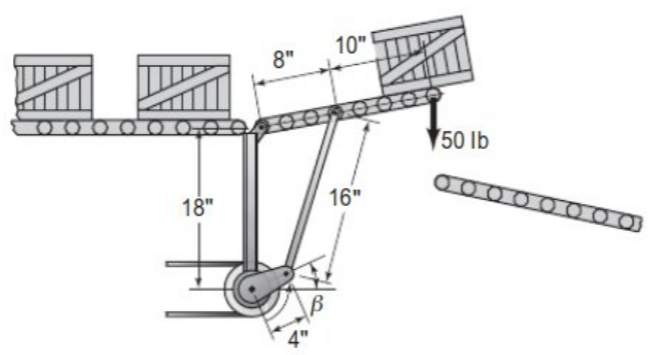

En el mecanismo de transferencia, el eslabón impulsor gira en sentido antihorario a una razón
constante de 25 [rpm], como se muestra en la figura, la caja pesa 50 [lb]. El peso del eslabón
impulsor y el acoplador es insignificante. El peso del eslabón transportador es de 28 [lb] y el
centro de gravedad está en su punto medio. El radio de giro del eslabón transportador en
relación con el centro de gravedad es de 26 [in]. Para β = 30°, determine lo siguiente:

A) La aceleración lineal del centro de gravedad del eslabón transportador.

B) La aceleración angular del eslabón transportador.

C) La fuerza y el torque inerciales del eslabón transportador.

D) Las fuerzas en los pernos.

E) El torque requerido para impulsar el mecanismo.


## Importación de librerias

In [1]:
import math
import numpy as np
import sympy as sp
from IPython.display import Math, display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


## 1) Definición del mecanismo y del perfil de entrada

### Eslabones:
- `L0`: **Bancada**
- `L1`: **Biela**
- `L2`: **Acoplador**
- `L3`: **Transportador**
- `L4`: **Extensión del Transportador**

### Juntas:
- `O_1`: **L0,R,L1**
- `A`:  **L1,R,L2**
- `B`:  **L2,R,L3**
- `O_4`: **L0,R,L3**

### Punto de Interés:
- `Y`: **Punto extremo del transportador**




# 1) Modelo cinemático

### Datos de entrada:

In [2]:
# --- Longitudes de eslabones (unidades arbitrarias, p. ej., mm) ---
l0x = 0  # logitud en x de bancada
l0y = 18
l1 = 4
l2 = 16
l3 = 8
l4 = 10

### Vectores posición

In [3]:
# --- Crear las variables angulares ---
th1 = sp.symbols('theta_1')
th2 = sp.symbols('theta_2')
th3 = sp.symbols('theta_3')

# --- definir mis verctores ---
Ro4 = sp.Matrix([[l0x],
                [l0y],
                [0]])

Ra = sp.Matrix([[l1*sp.cos(th1)],
                [l1*sp.sin(th1)],
                [0]])

Rab = sp.Matrix([[l2*sp.cos(th2)],
                 [l2*sp.sin(th2)],
                 [0]])

Ro4b = sp.Matrix([[l3*sp.cos(th3)],
                  [l3*sp.sin(th3)],
                  [0]])

Rb = Ra + Rab

Ro4y = sp.Matrix([[(l3+l4)*sp.cos(th3)],
                  [(l3+l4)*sp.sin(th3)],
                  [0]])

print("Vectores de posición relativa:")
print("Ra:")
display(Math(sp.latex(Ra)))
print("Rab:")
display(Math(sp.latex(Rab)))
print("Ro4b:")
display(Math(sp.latex(Ro4b)))
print("Ro4y:")
display(Math(sp.latex(Ro4y)))

Vectores de posición relativa:
Ra:


<IPython.core.display.Math object>

Rab:


<IPython.core.display.Math object>

Ro4b:


<IPython.core.display.Math object>

Ro4y:


<IPython.core.display.Math object>

### Vectores Velocidad

In [4]:
# --- Crear las variables de velocidades angulares ---
w1 = sp.symbols('omega_1')
w2 = sp.symbols('omega_2')
w3 = sp.symbols('omega_3')

# --- Crear los Vectores de velocidad --- (para angulares y escalares)
W1 = sp.Matrix([[0],
                [0],
                [w1]])

W2 = sp.Matrix([[0],
                [0],
                [w2]])

W3 = sp.Matrix([[0],
                [0],
                [w3]])

Va = W1.cross(Ra)

Vab = W2.cross(Rab)

Vo4b = W3.cross(Ro4b)

Vo4y = W3.cross(Ro4y)

Vb = Va + Vab
# Vb = Vo4b = W3.cross(Ro4b) ## otra forma de obtener Vb

print("Vectores de velocidad relativa:")
print("Va:")
display(Math(sp.latex(Va)))
print("Vab:")
display(Math(sp.latex(Vab)))
print("Vo4b:")
display(Math(sp.latex(Vo4b)))
print("Vo4y:")
display(Math(sp.latex(Vo4y)))

Vectores de velocidad relativa:
Va:


<IPython.core.display.Math object>

Vab:


<IPython.core.display.Math object>

Vo4b:


<IPython.core.display.Math object>

Vo4y:


<IPython.core.display.Math object>

### Vectores Aceleración

In [5]:
# --- Crear las variables de aceleraciones angulares ---
a1 = sp.symbols('alpha_1')
a2 = sp.symbols('alpha_2')
a3 = sp.symbols('alpha_3')

# --- Crear los Vectores de Aceleración --- (para angulares y escalares)
A1 = sp.Matrix([[0],
                [0],
                [a1]])

A2 = sp.Matrix([[0],
                [0],
                [a2]])

A3 = sp.Matrix([[0],
                [0],
                [a3]])

Aa_T = A1.cross(Ra)
Aa_N = -w1**2*Ra
Aa = Aa_T + Aa_N # + Aa_C ## -> la aceleración de Coriolis/ movimiento linean y rotacional

Aab_T = A2.cross(Rab)
Aab_N = -w2**2*Rab
Aab = Aab_T + Aab_N

Ab = Aa + Aab

Ao4b_T = A3.cross(Ro4b)
Ao4b_N = -w3**2*Ro4b
Ao4b = Ao4b_T + Ao4b_N

Ao4y_T = A3.cross(Ro4y)
Ao4y_N = -w3**2*Ro4y
Ao4y = Ao4y_T + Ao4y_N

#Ab = Ao4b = Ao4b_T + Ao4b_N ## otra forma de obtener la aceleración en B

print("Vectores de aceleración relativa:")
print("Aa:")
display(Math(sp.latex(Aa)))
print("Aab:")
display(Math(sp.latex(Aab)))
print("Ao4b:")
display(Math(sp.latex(Ao4b)))
print("Ao4y:")
display(Math(sp.latex(Ao4y)))

Vectores de aceleración relativa:
Aa:


<IPython.core.display.Math object>

Aab:


<IPython.core.display.Math object>

Ao4b:


<IPython.core.display.Math object>

Ao4y:


<IPython.core.display.Math object>

## 2) Escribir el modelo matemático

In [6]:
# Construir ecuaciones
Q = sp.Eq(Ra + Rab, Ro4 + Ro4b)

dQ = sp.Eq(Va + Vab, Vo4b)

ddQ = sp.Eq(Aa + Aab, Ao4b)

print("\n Modelo de posición:")
display(Math(sp.latex(Q)))
print("\n Modelo de velocidad:")
display(Math(sp.latex(dQ)))
print("\n Modelo de aceleración:")
display(Math(sp.latex(ddQ)))



 Modelo de posición:


<IPython.core.display.Math object>


 Modelo de velocidad:


<IPython.core.display.Math object>


 Modelo de aceleración:


<IPython.core.display.Math object>

## 3) Resolución del modelo
Para un instante determinado, un parámetro de entrada.

### Modelo de posición

In [7]:
# dato de entrada
theta1 = sp.rad(30)

valores = {th1: theta1}

# evaluación del dato de entrada
Q_eval = Q.evalf(subs=valores)
print("Modelo evaluado:")
display(Math(sp.latex(Q_eval)))

# soluciones
sol = sp.solve(Q_eval, (th2, th3))
print("Soluciones posibles:")
display(Math(sp.latex(sol)))

# selección de soluciones
theta2 = sol[1][0]
theta3 = sol[1][1]

# Mostrar resultados
print("theta1:", theta1.evalf())
display(sp.N(sp.deg(theta1), 5))
print("theta2:", theta2.evalf())
display(sp.N(sp.deg(theta2), 5))
print("theta3:", theta3.evalf())
display(sp.N(sp.deg(theta3), 5))


Modelo evaluado:


<IPython.core.display.Math object>

Soluciones posibles:


<IPython.core.display.Math object>

theta1: 0.523598775598299


30.000

theta2: 1.28507731522231


73.630

theta3: -0.0811706066920308


-4.6507

### Modelo de velocidad

In [26]:
# dato de entrada
omega1 = 25.0*sp.pi/30

valores = {th1: theta1.evalf(),
           th2: theta2.evalf(),
           th3: theta3.evalf(),
           w1: omega1}

# evaluación del dato de entrada
dQ_eval = dQ.evalf(subs=valores)
print("Modelo evaluado:")
display(Math(sp.latex(dQ_eval)))

# soluciones
sol = sp.solve(dQ_eval, (w2, w3))
print("Solución")
display(Math(sp.latex(sol)))

# Almacenar en memoria
omega2 = sol[w2]
omega3 = sol[w3]

# Mostrar resultados
print("omega1:", omega1)
display(sp.N(omega1, 5))
print("omega2:", omega2.evalf())
display(sp.N(omega2, 5))
print("omega3:", omega3.evalf())
display(sp.N(omega3, 5))

Modelo evaluado:


<IPython.core.display.Math object>

Solución


<IPython.core.display.Math object>

omega1: 0.833333333333333*pi


2.6180

omega2: -0.380052781724197


-0.38005

omega3: 0.922427953598308


0.92243

### Modelo de aceleración

In [28]:
# dato de entrada
alpha1 = 0.0

valores = {th1: theta1.evalf(),
           th2: theta2.evalf(),
           th3: theta3.evalf(),
           w1: omega1.evalf(),
           w2: omega2.evalf(),
           w3: omega3.evalf(),
           a1: alpha1}

# evaluación del dato de entrada
ddQ_eval = ddQ.evalf(subs=valores)
print("Modelo evaluado:")
display(Math(sp.latex(ddQ_eval)))

# soluciones
sol = sp.solve(ddQ_eval, (a2, a3), check=False)
print("Solución")
display(Math(sp.latex(sol)))

# Almacenar en memoria
alpha2 = sol[a2]
alpha3 = sol[a3]

# Mostrar resultados
print("alpha1:", alpha1)
display(sp.N(alpha1, 5))
print("alpha2:", alpha2.evalf())
display(sp.N(alpha2, 5))
print("alpha3:", alpha3.evalf())
display(sp.N(alpha3, 5))

Modelo evaluado:


<IPython.core.display.Math object>

Solución


<IPython.core.display.Math object>

alpha1: 0.0


0

alpha2: -1.03504024831632


-1.0350

alpha3: -2.65180981438419


-2.6518

# Resultado modelo cinemático

In [29]:
# resultados
valores = {th1: theta1.evalf(),
           th2: theta2.evalf(),
           th3: theta3.evalf(),
           w1: omega1.evalf(),
           w2: omega2.evalf(),
           w3: omega3.evalf(),
           a1: alpha1,
           a2: alpha2.evalf(),
           a3: alpha3.evalf()}

valores

{theta_1: 0.523598775598299,
 theta_2: 1.28507731522231,
 theta_3: -0.0811706066920308,
 omega_1: 2.61799387799149,
 omega_2: -0.380052781724197,
 omega_3: 0.922427953598308,
 alpha_1: 0.0,
 alpha_2: -1.03504024831632,
 alpha_3: -2.65180981438419}

# 2) Modelo Dinámico

## Definici+on de vectores

### Ecuaciones del eslabon `L1`: **Biela**

#### Datos de entrada

In [11]:
# Constantes
g = sp.Matrix([[0],
               [-9.81],
               [0]])
m1 = sp.symbols('m_1')  # m1 = 0
I1 = (1/12)*m1*l1**2

# Variables
fx10 = sp.symbols('f^x_10')
fy10 = sp.symbols('f^y_10')
f12 = sp.symbols('f_12')

to1 = sp.symbols('tau_o1')

#### Definir mis vectores
##### Vectores fuerzas

In [12]:
# Vectores fuerza
F10 = sp.Matrix([[fx10],
                 [fy10],
                 [0]])
F12 = sp.Matrix([[f12*sp.cos(th2)],
                 [f12*sp.sin(th2)],
                 [0]])
We1 = m1*g

# Condición de movimiento
## Para la posición de G1
Rg1 = sp.Matrix([[0.5*l1*sp.cos(th1)],
                 [0.5*l1*sp.sin(th1)],
                 [0]])
## Para la Ag1
Ag1_T = A1.cross(Rg1)
Ag1_N = -w1**2*Rg1
Ag1 = Ag1_T + Ag1_N

##### Vectores Torque

In [13]:
# Vectores torque
## Contruyo vectores torque
To1 = sp.Matrix([[0],
                 [0],
                 [to1]])

## Extraer componetes vectoriales
Rg1_x = sp.Matrix([[Rg1[0]],
                   [0],
                   [0]])
Ra_x = sp.Matrix([[Ra[0]],
                  [0],
                  [0]])
F12_y = sp.Matrix([[0],
                   [F12[1]],
                   [0]])

#### Ecuaciones

In [14]:
SF1 = sp.Eq(F10 + F12 + We1, m1*Ag1)
ST1 = sp.Eq(To1 + Rg1_x.cross(We1) + Ra_x.cross(F12_y), I1*A1)

### Ecuaciones del eslabon `L2`: **Acoplador**

#### Datos de entrada

In [47]:
# Constantes
g = sp.Matrix([[0],
               [-9.81],
               [0]])
m2 = sp.symbols('m_2')  # m2 = 0
I2 = (1/12)*m2*l2**2

# Variables
f12 = sp.symbols('f_12')
f23 = sp.symbols('f_23')

#### Definir mis vectores
##### Vectores fuerzas

In [16]:
# Vectores fuerza
F21 = sp.Matrix([[f12*sp.cos(th2-sp.pi)],
                 [f12*sp.sin(th2-sp.pi)],
                 [0]])
F23 = sp.Matrix([[f23*sp.cos(th2)],
                 [f23*sp.sin(th2)],
                 [0]])
We2 = m2*g

# Condición de movimiento
## Para la posición de G2
Rag2 = sp.Matrix([[0.5*l2*sp.cos(th2)],
                  [0.5*l2*sp.sin(th2)],
                  [0]])

Rg2 = Ra + Rag2
## Para la Ag1
Aag2_T = A2.cross(Rag2)
Aag2_N = -w2**2*Rag2
Aag2 = Aag2_T + Aag2_N

Ag2 = Aa + Aag2

##### Vectores Torque

In [45]:
# Vectores torque

## Extraer componetes vectoriales

Rab_x = sp.Matrix([[Rab[0]],
                  [0],
                  [0]])
F23_y = sp.Matrix([[0],
                   [F23[1]],
                   [0]])

#### Ecuaciones

In [58]:
SF2 =sp.Eq(F21 + F23 + We2, m2*Ag2)
ST2 = sp.Eq(0.5*Rab_x.cross(We2) + Rab_x.cross(F23_y), I2*A2)

ST2

Eq(Matrix([
[                                                         0],
[                                                         0],
[16*f_23*sin(theta_2)*cos(theta_2) - 78.48*m_2*cos(theta_2)]]), Matrix([
[                           0],
[                           0],
[21.3333333333333*alpha_2*m_2]]))

### Ecuaciones del eslabon `L3`: **Transportador**

#### Datos de entrada

In [71]:
# Constantes
g = sp.Matrix([[0],
               [-9.81],
               [0]])
mt = sp.symbols('m_t')  # Weyt = -28j [lbf]
I3 = (1/12)*mt*(l3+l4)**2

# Variables
fx30 = sp.symbols('f^x_30')
fy30 = sp.symbols('f^y_30')

#### Definir mis vectores
##### Vectores fuerzas

In [35]:
# Vectores fuerza
F30 = sp.Matrix([[fx30],
                 [fy30],
                 [0]])
F23 = sp.Matrix([[f23*sp.cos(th2)],
                 [f23*sp.sin(th2)],
                 [0]])
Wet = sp.Matrix([[0],
                 [-28],
                 [0]])
Wec = sp.Matrix([[0],
                 [-50],
                 [0]])

# Condición de movimiento
## Para la posición de GT
Ro4gt = sp.Matrix([[0.5*(l3+l4)*sp.cos(th3)],
                  [0.5*(l3+l4)*sp.sin(th3)],
                  [0]])

## Para la Agt
Agt_T = A3.cross(Ro4gt)
Agt_N = -w3**2*Ro4gt
Agt = Agt_T + Agt_N

#### Ecuaciones

In [38]:
SF3 = sp.Eq(F30 + F23 + Wet + Wec, mt*Agt)

## Sistema de ecuaciones

In [62]:
MD = [SF1, sp.Eq(F12, -F23), SF3, ST1, ST2]
print("\n Modelo Dinámico:")
display(Math(sp.latex(MD)))

# resultados
valores = {th1: theta1.evalf(),
           th2: theta2.evalf(),
           th3: theta3.evalf(),
           w1: omega1.evalf(),
           w2: omega2.evalf(),
           w3: omega3.evalf(),
           a1: alpha1,
           a2: alpha2.evalf(),
           a3: alpha3.evalf(),
           m1: 0,
           m2: 0,
           mt: 28/32.6}


# Evaluo el modelo dinámico
MD_eval = MD
for i in range(len(MD)):
    MD_eval[i] = MD[i].evalf(subs=valores)
print("Modelo evaluado:")
display(Math(sp.latex(MD_eval)))

# Resolver el modelo
# soluciones
sol = sp.solve(MD_eval, (fx10, fy10, f12, f23, fx30, fy30, to1))
print("Solución")
display(Math(sp.latex(sol)))

sol


 Modelo Dinámico:


<IPython.core.display.Math object>

Modelo evaluado:


<IPython.core.display.Math object>

Solución


<IPython.core.display.Math object>

{f^x_10: 0.0,
 f^x_30: -8.21770863341692,
 f^y_10: 0.0,
 f^y_30: 58.1021373871221,
 f_12: 0.0,
 f_23: 0.0,
 tau_o1: 0.0}

# Resultado modelo dinámico

In [63]:
valores = {th1: theta1.evalf(),
           th2: theta2.evalf(),
           th3: theta3.evalf(),
           w1: omega1.evalf(),
           w2: omega2.evalf(),
           w3: omega3.evalf(),
           a1: alpha1,
           a2: alpha2.evalf(),
           a3: alpha3.evalf(),
           m1: 0,
           m2: 0,
           mt: 28/32.6,
           fx10: sol[fx10],
           fy10: sol[fy10],
           f12: sol[f12],
           f23: sol[f23],
           fx30: sol[fx30],
           fy30: sol[fy30],
           to1: sol[to1]}

valores

{theta_1: 0.523598775598299,
 theta_2: 1.28507731522231,
 theta_3: -0.0811706066920308,
 omega_1: 2.61799387799149,
 omega_2: -0.380052781724197,
 omega_3: 0.922427953598308,
 alpha_1: 0.0,
 alpha_2: -1.03504024831632,
 alpha_3: -2.65180981438419,
 m_1: 0,
 m_2: 0,
 m_t: 0.8588957055214723,
 f^x_10: 0.0,
 f^y_10: 0.0,
 f_12: 0.0,
 f_23: 0.0,
 f^x_30: -8.21770863341692,
 f^y_30: 58.1021373871221,
 tau_o1: 0.0}

# 3) Resultados

A) La aceleración lineal del centro de gravedad del eslabón transportador.

In [64]:
#La posición de Ro4gt
Ro4gt = sp.Matrix([[((l3+l4)/2)*sp.cos(th3)],
                   [((l3+l4)/2)*sp.sin(th3)],
                   [0]])

# La Aceleración lineal
Ao4gt_T = A3.cross(Ro4gt)
Ao4gt_N = -w3**2*Ro4gt
Ao4gt = Ao4gt_T + Ao4gt_N

print("Muestro Aceleración lineal del centro de gravedad de el trasportador:")
display(sp.N(Ao4gt.evalf(subs=valores), 3))

Muestro Aceleración lineal del centro de gravedad de el trasportador:


Matrix([
[-9.57],
[-23.2],
[    0]])

B) La aceleración angular del eslabón transportador.

In [65]:
print("Muestro Aceleración angular del eslabon transportador:")
display(sp.N(A2.evalf(subs=valores), 3))

Muestro Aceleración angular del eslabon transportador:


Matrix([
[    0],
[    0],
[-1.04]])

C) La fuerza y el torque inerciales del eslabón transportador.

In [72]:
# La fuerza inercial:
print("Muestro la fuerza inercial del eslabon transportador:")
display(sp.N((mt*Agt).evalf(subs=valores), 3))

# el torque inercial:
print("Muestro el torque inercial del eslabon transportador:")
display(sp.N((I3*A3).evalf(subs=valores), 3))


Muestro la fuerza inercial del eslabon transportador:


Matrix([
[-8.22],
[-19.9],
[    0]])

Muestro el torque inercial del eslabon transportador:


Matrix([
[    0],
[    0],
[-61.5]])

D) Las fuerzas en los pernos.

In [67]:
# Las fuerzas de los pernos son todas las fuerzas existentes en las juntas
print("\nFuerza de la junta O1:")
display(sp.N(F10.evalf(subs=valores), 3))
print("\nFuerza de la junta A:")
display(sp.N(F12.evalf(subs=valores), 3))
print("\nFuerza de la junta B:")
display(sp.N(F23.evalf(subs=valores), 3))
print("\nFuerza de la junta O4:")
display(sp.N(F30.evalf(subs=valores), 3))


Fuerza de la junta O1:


Matrix([
[0],
[0],
[0]])


Fuerza de la junta A:


Matrix([
[0],
[0],
[0]])


Fuerza de la junta B:


Matrix([
[0],
[0],
[0]])


Fuerza de la junta O4:


Matrix([
[-8.22],
[ 58.1],
[    0]])

E) El torque requerido para impulsar el mecanismo.

In [68]:
# El torque en O1
print("\nTorque de la junta O1:")
display(sp.N(To1.evalf(subs=valores), 3))


Torque de la junta O1:


Matrix([
[0],
[0],
[0]])